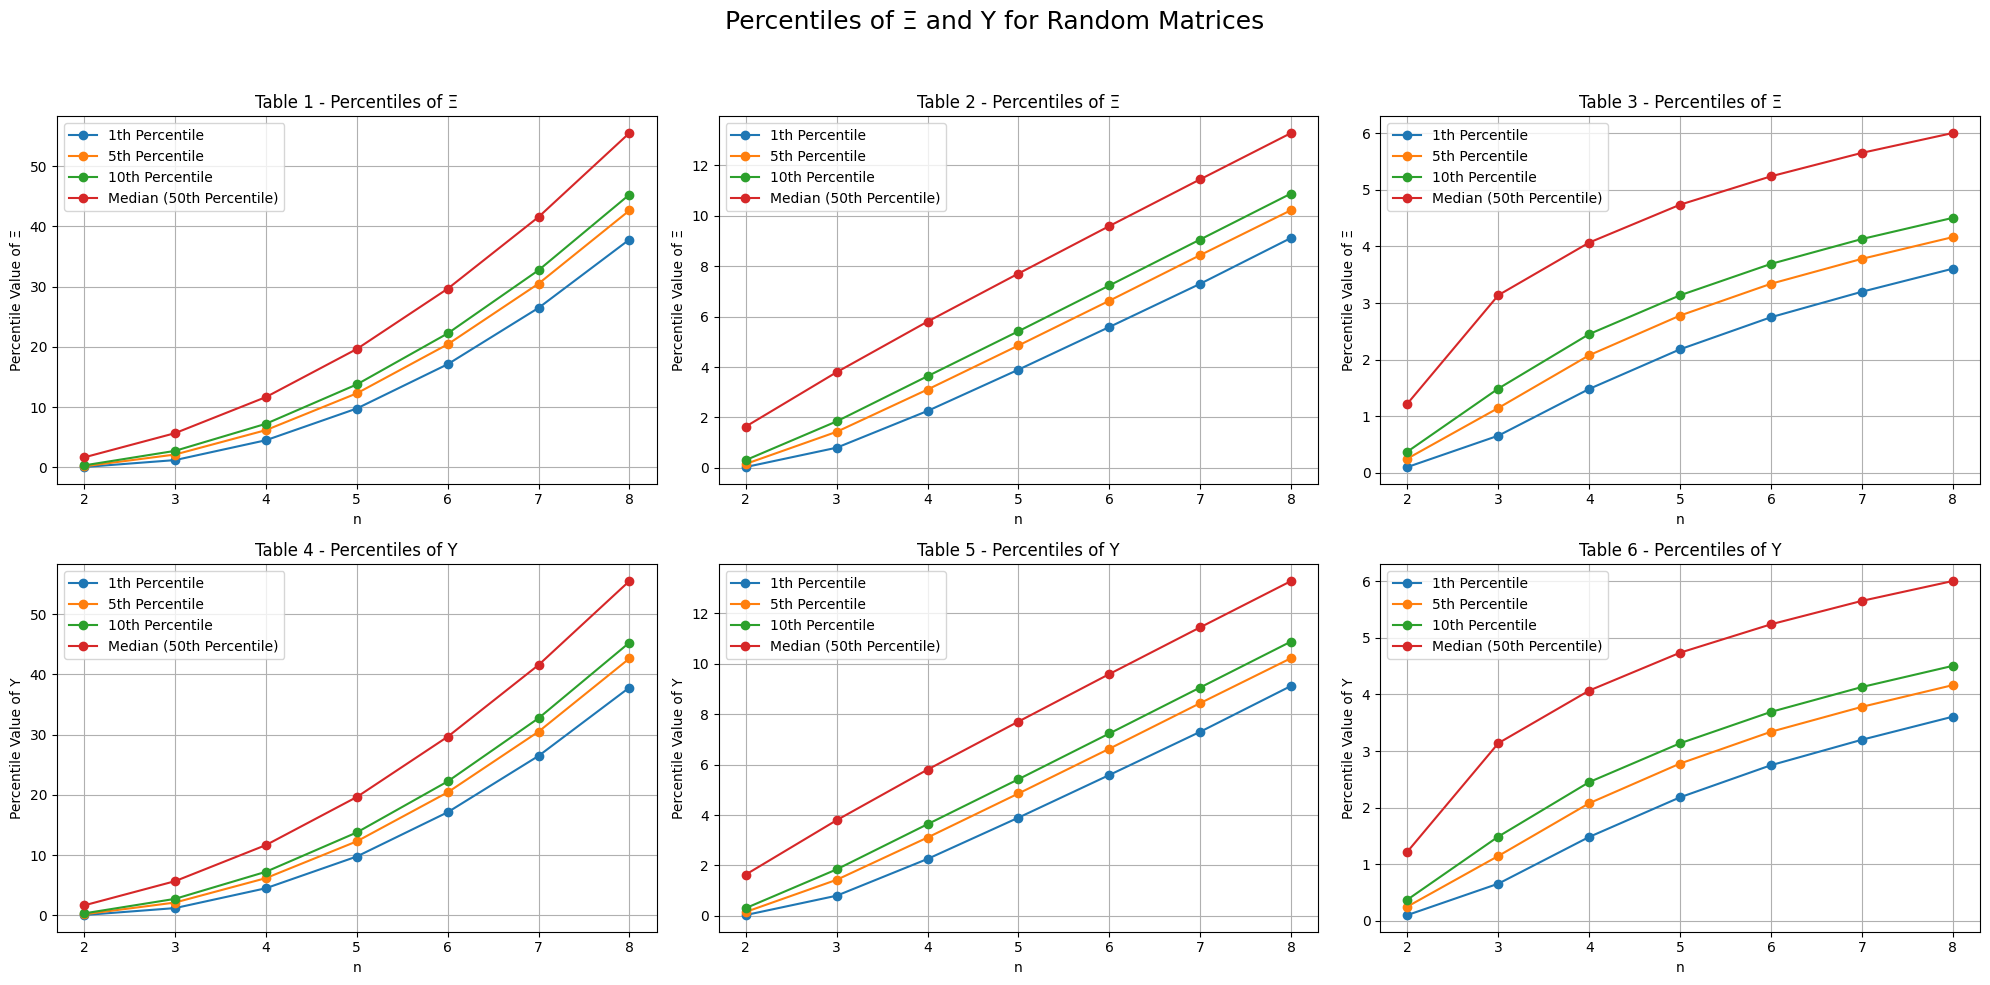

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob


files_norm1 = sorted(glob.glob("n_*x*_p_1.xlsx"))  # Norm p=1
files_norm2 = sorted(glob.glob("n_*x*_p_2.xlsx"))  # Norm p=2
files_norminf = sorted(glob.glob("n_*x*_p_inf.xlsx"))  # Norm p=∞

# Extraer valores de 'n' desde los nombres de los archivos
n_values = [int(f.split('_')[1][0]) for f in files_norm1]

# Función para extraer percentiles de cada archivo
def extract_percentiles(files, percentiles=[1, 5, 10, 50]):
    data = {p: [] for p in percentiles}
    for file in files:
        df = pd.read_excel(file)
        for p in percentiles:
            value = df[df['percentile'] == p]['Avg'].values[0]
            data[p].append(value)
    return data

# Extraer datos
data_norm1 = extract_percentiles(files_norm1)
data_norm2 = extract_percentiles(files_norm2)
data_norminf = extract_percentiles(files_norminf)

# Crear figura
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Percentiles of Ξ and Υ for Random Matrices', fontsize=18)


def plot_subplot(ax, n_values, data, title):
    percentiles = sorted(data.keys())
    for p in percentiles:
        label = f"{p}th Percentile" if p != 50 else "Median (50th Percentile)"
        ax.plot(n_values, data[p], marker='o', label=label)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('n')
    ax.set_ylabel('Percentile Value of Ξ' if 'Ξ' in title else 'Percentile Value of Υ')
    ax.grid(True)  # ✅ Añadir grid
    ax.set_xticks(n_values)  # ✅ Mostrar n = 2, 3, 4, 5, 6, 7, 8
    ax.legend()


plot_subplot(axs[0, 0], n_values, data_norm1, 'Table 1 - Percentiles of Ξ')
plot_subplot(axs[0, 1], n_values, data_norm2, 'Table 2 - Percentiles of Ξ')
plot_subplot(axs[0, 2], n_values, data_norminf, 'Table 3 - Percentiles of Ξ')


plot_subplot(axs[1, 0], n_values, data_norm1, 'Table 4 - Percentiles of Υ')
plot_subplot(axs[1, 1], n_values, data_norm2, 'Table 5 - Percentiles of Υ')
plot_subplot(axs[1, 2], n_values, data_norminf, 'Table 6 - Percentiles of Υ')

plt.tight_layout(rect=[0, 0, 1, 0.95])


fig.savefig('figure2.png', dpi=300)  

plt.show()
